# D13-1
* **使用 Day 12 學到的方法, 對較完整的資料生成離散化特徵**

* **觀察上述離散化特徵, 對於目標值的預測有沒有幫助**

* **仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化**

* **繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖**

In [22]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# 設定 data_path
dir_data = './data/Part01/'

In [52]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [48]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH']) / 365

**離散化 DAYS_BIRTH 欄位**

In [62]:
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [63]:
bins = [20, 30, 40, 50, 60, 70]
app_train['YEARS_BIRTH'] = pd.cut(app_train['DAYS_BIRTH'], bins = bins)

<function matplotlib.pyplot.show>

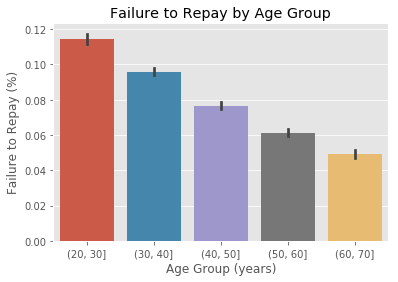

In [64]:
px = app_train['YEARS_BIRTH']
py = app_train['TARGET']

sns.barplot(px, py)
plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');
plt.show

**離散化 AMT_INCOME_TOTAL 欄位**

In [49]:
app_train["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [53]:
q0 = np.percentile(app_train["AMT_INCOME_TOTAL"],q = 0)
q25 = np.percentile(app_train["AMT_INCOME_TOTAL"],q = 25)
q50 = np.percentile(app_train["AMT_INCOME_TOTAL"],q = 50)
q75 = np.percentile(app_train["AMT_INCOME_TOTAL"],q = 75)
q90 = np.percentile(app_train["AMT_INCOME_TOTAL"],q = 90)
q100 = np.percentile(app_train["AMT_INCOME_TOTAL"],q = 100)
bins = [q0, q25, q50, q75, q90, q100]
app_train['AMT_INCOME_TOTAL'] = pd.cut(app_train['AMT_INCOME_TOTAL'], bins = bins)

<function matplotlib.pyplot.show>

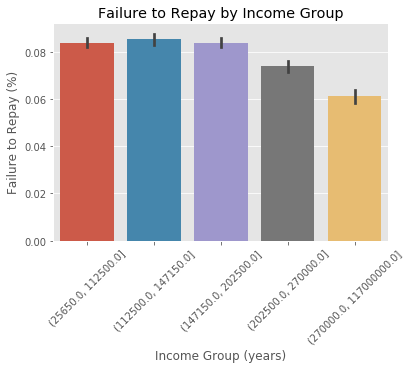

In [55]:
px = app_train['AMT_INCOME_TOTAL']
py = app_train['TARGET']

sns.barplot(px, py)
plt.xticks(rotation = 45);
plt.xlabel('Income Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Income Group');
plt.show